## Homework 2

* Import and Analyze Data
* Visualize Data with Plots
* Solve Systems of Equations

#### Problem #1
Solution in Python for comparison to Excel solution.

Apple Data
         Date        Open        High         Low       Close   Adj Close  \
0  2018-04-04  164.880005  172.009995  164.770004  171.610001  171.610001   
1  2018-04-05  172.580002  174.229996  172.080002  172.800003  172.800003   
2  2018-04-06  170.970001  172.479996  168.199997  168.380005  168.380005   
3  2018-04-09  169.880005  173.089996  169.850006  170.050003  170.050003   
4  2018-04-10  173.000000  174.000000  171.529999  173.250000  173.250000   

     Volume  
0  34605500  
1  26933200  
2  35005300  
3  29017700  
4  28408600  
Google Data
19    1037.310059
20    1024.380005
21    1023.719971
22    1035.359985
Name: Close, dtype: float64
Stock: Apple
 max   : 182.929794
 min   : 162.320007
 stdev : 5.568684970408456
 avg   : 171.171297
 median: 172.440002
Stock: Google
 max   : 1087.699951
 min   : 1007.0399779999999
 stdev : 21.580811336365283
 avg   : 1036.9786961304346
 median: 1030.050049


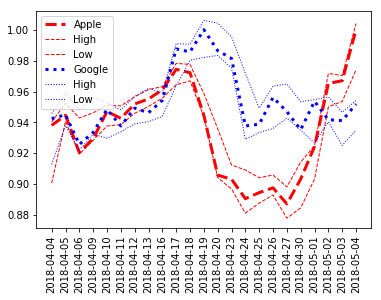

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# import April 2018 data or get new data from finance.yahoo.com
appl = pd.read_csv('https://apmonitor.com/che263/uploads/Main/AAPL.csv')
goog = pd.read_csv('https://apmonitor.com/che263/uploads/Main/GOOG.csv')
#xom = pd.read_csv('https://apmonitor.com/che263/uploads/Main/XOM.csv')
# create dictionary of stocks
s = dict([('Apple',appl),('Google',goog)]) #,('ExxonMobil',xom)])

# print column headers and starting rows (5 is default)
print('Apple Data')
print(s['Apple'].head())

# print column headers and ending close price (4 rows)
print('Google Data')
print(s['Google']['Close'].tail(4))

# basic data statistics
for i in s:
    print('Stock: ' + i)
    print(' max   : ' + str(max(s[i]['Close'])))
    print(' min   : ' + str(min(s[i]['Close'])))
    print(' stdev : ' + str(np.std(s[i]['Close'])))
    print(' avg   : ' + str(np.mean(s[i]['Close'])))
    print(' median: ' + str(np.median(s[i]['Close'])))

# plot data
plt.figure()
sty = dict([('Apple','r--'),('Google','b:'),('ExxonMobil','k-')])
ni = 0
for i in s:
    mc = max(s[i]['Close'])
    plt.plot(s[i]['Date'],s[i]['Close']/mc,sty[i],linewidth=3,label=i)
    plt.plot(s[i]['Date'],s[i]['High']/mc,sty[i],linewidth=1)
    plt.plot(s[i]['Date'],s[i]['Low']/mc,sty[i],linewidth=1)
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.show()

#### Problem #2
Solution in Python for comparison to Excel solution.

In [4]:
# method #1: NumPy
from scipy.optimize import fsolve
def f(z):
    x,y=z
    f1 = 2*x**2+y**2-1
    f2 = (0.5*x-0.5)**2+2.0*(y-0.25)**2-1
    return [f1,f2]
x,y = fsolve(f,[1,1])
print('NumPy Solution')
print(x,y)

# method #2: Gekko
# install Gekko, if needed
try:
    from gekko import GEKKO
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','gekko'])
    from gekko import GEKKO
    
m = GEKKO()
x,y = [m.Var(value=1) for i in range(2)]
m.Equation(2*x**2+y**2==1)
m.Equation((0.5*x-0.5)**2+2.0*(y-0.25)**2==1)
m.solve(disp=False)
print('Gekko Solution')
print(x.value)
print(y.value)  

NumPy Solution
0.2912703797138028 0.911220682273395
Gekko Solution
[0.29127037975]
[0.91122068228]


#### Problem #3
Solution in Python for comparison to Excel solution.

In [6]:
from gekko import GEKKO

# constants
y1 = 0.33
y2 = 1.0-y1
P = 120.0 # kPa

# Antoine constants
# Benzene
ac1 = [13.7819, 2726.81, 217.572]
# Toluene
ac2 = [13.9320, 3056.96, 217.625]

# gekko model
m = GEKKO()
T = m.Var(value=100)
x1,x2 = [m.Var(value=0.5,lb=0,ub=1) for i in range(2)]
# vapor pressure
Psat1 = m.Intermediate(m.exp(ac1[0]-ac1[1]/(T+ac1[2])))
Psat2 = m.Intermediate(m.exp(ac2[0]-ac2[1]/(T+ac2[2])))
# Raoult's law
m.Equation(y1*P==x1*Psat1)
m.Equation(y2*P==x2*Psat2)
m.Equation(x1+x2==1)
m.options.IMODE=1
m.solve(disp=False)
print('Solution')
print('x1: ' + str(x1.value))
print('x2: ' + str(x2.value))
print('T:  ' + str(T.value))

Solution
x1: [0.17262755316]
x2: [0.82737244684]
T:  [109.13089106]
